# Background

## Some hypotheses on the movement maps

UTC 00:00 = EDT 19:00 --> People move from workplace to home between 11am and 7pm. The importance of a node from the graph indicates the residential competativeness of the node city. (7pm-3am)

UTC 08:00 = EDT 03:00 --> People do not move much between 7pm and 3am, but it is also worth exploring since during disasters there might be a surge in travellers during midnight time. (3am-11am)

UTC 16:00 = EDT 11:00 --> People move most frequently between 3am to 11am, ideally from workplace home. The importance of a node from the graph indicates the economic competatitiveness of the node city. (11am-7pm)

## Facts
Please refer to the project proposal for the detailed disaster facts. North Carolina, South Carolina, Virginia are the 3 most affected states by Hurricane Florence. The 3 states are the foci of this case study. Evacuation details can be found from the link here:
https://www.businessinsider.com/know-your-zone-hurricane-florence-evacuations-carolinas-virginia-2018-9

## Economy in the 3 states

North Carolina includes the following metropolitan areas: Asheville, Burlington, Charlotte-Gastonia-Rock Hill (NC-SC), Durham-Chapel Hill, Fayetteville, Goldsboro, Greensboro-High Point, Greenville, Hickory-Lenoir-Morganton, Jacksonville, Myrtle Beach-Conway-North Myrtle Beach (includes Brunswick County, NC), Raleigh-Cary, Rocky Mount, Virginia Beach-Norfolk-Newport News (includes Northeastern NC and part of Outer Banks), Wilmington, and Winston-Salem

North Carlina most populated cities:

Rank|Name|County|Pop.
------ | ------ | ------| ------
1 | Charlotte | Mecklenburg | 842,051 
2|	Raleigh	|Wake|	458,880
3|	Greensboro|	Guilford|	287,027
4|	Durham	|Durham|	263,016
5|	Winston-Salem|	Forsyth|	244,605
6|	Fayetteville|	Cumberland|	204,759
7|	Cary|	Wake|	162,320
8|	Wilmington|	New Hanover|	117,525
9|	High Point|	Guilford|	111,223
10|	Greenville|	Pitt|	91,495

South Carlina most populated cities:

Rank|Name|County|Pop.
------ | ------ | ------| ------
1|Charleston|Charleston	|134,385
2|Columbia	|Richland	|134,309
3|	North Charleston	|Charleston	|108,304
4| Mount Pleasant|	Charleston|	81,317
5|	Rock Hill|	York|	72,937
6|	Greenville|	Greenville|	67,453
7|	Summerville|	Dorchester|	48,848
8|	Sumter|	Sumter|	40,816
9|	Goose Creek|	Berkeley|	40,633
10|	Hilton Head Island|	Beaufort	|40,512

Virginia most populated cities:

Rank|Name|County|Pop.
------ | ------ | ------| ------
1	|Virginia Beach|	Independent city|	452,602	
2	|Norfolk	|Independent city	|245,115
3	|Chesapeake	|Independent city	|237,940
4	|Arlington	|Arlington	|230,050
5	|Richmond	|Independent city	|223,170
6	|Newport News	|Independent city	|181,825
7	|Alexandria	|Independent city	|155,810
8	|Hampton	|Independent city	|135,410
9	|Roanoke	|Independent city	|99,660
10	|Portsmouth	|Independent city	|95,252

# Dataframe

## Load Data on Sept 10 11:00 - 19:00 EDT (Dataset named as UTC 00:00)

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy, deepcopy
import geocoder
import geopy.distance
from pprint import pprint
import folium
import igraph
sns.set()

In [33]:
def geo_location(df):
    extracted_lonlat=df['Geometry'][df['Geometry'].str.contains('POINT')].str.replace('(POINT )|\(|\)|,', '').str.split()
    df['Geometry'][df['Geometry'].str.contains('POINT')] = list(map(lambda x: x[0] + ', ' + x[1] + ', '+x[0] + ', ' + x[1], extracted_lonlat))
    split_lonlat = df['Geometry'].str.replace('(MULTILINESTRING )|\(|\)|,', '').str.split()
    location_features = ['Starting location lon', 'Starting location lat', 'Ending location lon', 'Ending location lat']
    for i in range(4):
        df[location_features[i]] = pd.Series(map(lambda x: x[i], split_lonlat)).astype('float')

## Add Geo-locations

The geo-locations are not precise. They are extracted from the arrow geometry, which is used more for a drawing purpose rather than a geological purpose.

In [34]:
df = pd.read_csv('Datasets/florence_admin_movement_sep_10_16.csv')
geo_location(df)
df.head()

/anaconda2/envs/Py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date Time,Ending Location,Ending Region Name,Length(km),Baseline: People Moving,Crisis: People Moving,Difference,Percent Change,Starting Location,Starting Region Name,Standard (Z) Score,Geometry,Starting location lon,Starting location lat,Ending location lon,Ending location lat
0,2018-09-10 1600,5,Egg Harbor Township,15.960285,0.0,99.0,NaN,NaN,3,Brigantine,221.370730,MULTILINESTRING ((-74.3994140599999980 39.4022...,-74.399414,39.402236,-74.584961,39.402236
1,2018-09-10 1600,39,Millville_2,46.008833,0.0,6.0,NaN,NaN,16,Ventnor City,13.416408,MULTILINESTRING ((-74.4873046900000020 39.3342...,-74.487305,39.334289,-75.014648,39.402236
2,2018-09-10 1600,39,Millville_2,15.120270,0.0,13.0,13.0,1300.000000,4,Dorothy_1,29.068884,MULTILINESTRING ((-74.8388671900000020 39.4022...,-74.838867,39.402236,-75.014648,39.402236
3,2018-09-10 1600,3063,Richmond_3,147.049182,25.6,16.0,-10.6,-38.405797,3975,Virginia Beach_3,-1.170210,MULTILINESTRING ((-76.0693359400000020 36.8444...,-76.069336,36.844453,-77.475586,37.544569
4,2018-09-10 1600,5069,Durham_6,31.748701,4.0,9.0,NaN,NaN,5070,Fuquay Varina_2,7.071068,MULTILINESTRING ((-78.7939453099999980 35.6394...,-78.793945,35.639433,-78.793945,35.924637


## Fill NA

### Fill null values

There are many NA values in the datasets. Often times, 'Baseline: People Moving' and 'Crisis: People Moving' are NA at the same time; 'Difference' and 'Percentage Change' are NA at the same time. These 4 features are filled first.

In [36]:
idx = pd.isnull(df['Baseline: People Moving'])
df['Baseline: People Moving'][idx] = 100 * df[idx]['Difference']/df[idx]['Percent Change']
idx = pd.isnull(df['Crisis: People Moving'])
df['Crisis: People Moving'][idx] = df[idx]['Difference'] + df[idx]['Baseline: People Moving']

/anaconda2/envs/Py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/envs/Py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
idx = pd.isnull(df['Difference'])
df['Difference'][idx] = df['Crisis: People Moving'][idx] - df['Baseline: People Moving'][idx]
idx = pd.isnull(df['Percent Change'])
df['Percent Change'][idx] = df['Difference'][idx] / df['Baseline: People Moving'][idx] *100

/anaconda2/envs/Py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/envs/Py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Z score is calculated as:

$$Standard (Z) Score = \frac{Crisis: People Moving - Baseline: People Moving}{Standard Deviation of Baseline (Unknown)}$$

However, there are inconsistencies in the datasets. 

$$Crisis: People Moving - Baseline: People Moving \neq Difference$$

I found 'Crisis: People Moving' and 'Difference' are more reliable values because 0 exists extensively in 'Baseline: People Moving' and in a large number of cases it does not make sense. 'Baseline: People Moving' is recalculated as 'Crisis: People Moving' - 'Difference'. The 'Standard (Z) Score' are recalculated based on the median $\frac{standard deviation}{baseline}$ value from the rest of the samples.


/anaconda2/envs/Py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a1a44d0>]],
      dtype=object)

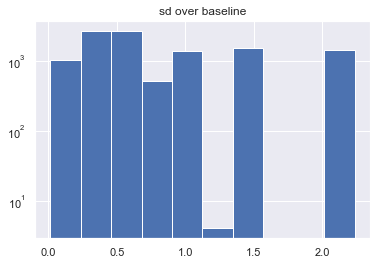

In [38]:
df_z_calc = df[(pd.isnull(df['Standard (Z) Score'])==False) & (df['Crisis: People Moving'] - df['Baseline: People Moving']==df['Difference']) & (df['Standard (Z) Score']!=0) &(df['Baseline: People Moving']>0)]
df_z_calc['sd over baseline'] = df_z_calc['Difference'] / df_z_calc['Standard (Z) Score'] / df_z_calc['Baseline: People Moving']
df_z_calc.hist('sd over baseline', log=True)

In [39]:
df_z_calc['sd over baseline'].describe()

count    11275.000000
mean         0.863308
std          0.639599
min          0.015614
25%          0.390878
50%          0.609895
75%          1.369306
max          2.236068
Name: sd over baseline, dtype: float64

In [40]:
sd_over_baseline = df_z_calc['sd over baseline'].median()

In [41]:
df['Baseline: People Moving'] = df['Crisis: People Moving'] - df['Difference']

In [42]:
idx = (pd.isnull(df['Standard (Z) Score'])|idx)&(df['Baseline: People Moving']!=0)
df['Standard (Z) Score'][idx] = df['Difference'][idx]/(sd_over_baseline * df['Baseline: People Moving'][idx])

/anaconda2/envs/Py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
pd.isnull(df).any()

Date Time                  False
Ending Location            False
Ending Region Name         False
Length(km)                 False
Baseline: People Moving    False
Crisis: People Moving      False
Difference                 False
Percent Change             False
Starting Location          False
Starting Region Name       False
Standard (Z) Score         False
Geometry                   False
Starting location lon      False
Starting location lat      False
Ending location lon        False
Ending location lat        False
dtype: bool

In [44]:
df.describe()

,Ending Location,Length(km),Baseline: People Moving,Crisis: People Moving,Difference,Percent Change,Starting Location,Standard (Z) Score,Starting location lon,Starting location lat,Ending location lon,Ending location lat
count,24426.000000,2.442600e+04,24426.000000,24426.000000,24426.000000,2.442600e+04,24426.000000,24426.000000,24426.000000,24426.000000,24426.000000,24426.000000
mean,2674.849423,3.111194e+01,111.582591,112.808851,1.226260,inf,2670.108614,26.226007,-79.895157,36.550028,-79.899110,36.639544
std,1671.112011,4.287160e+01,1445.696827,1375.604967,119.798852,NaN,1670.921541,633.158100,2.678975,2.073879,2.680435,2.076451
min,-1.000000,1.143749e-12,0.000000,3.000000,-14383.566667,-9.899933e+01,-1.000000,-12.755943,-84.419722,31.914083,-84.418945,31.914860
25%,1178.000000,1.163402e+01,1.200000,4.000000,-0.800000,-4.580153e+00,1171.000000,-0.094430,-82.281122,34.921963,-82.304692,34.993996
50%,2633.000000,2.271003e+01,6.400000,8.000000,2.400000,2.327578e+01,2630.000000,0.910022,-79.848633,36.633154,-79.848633,36.703652
75%,4156.750000,3.555975e+01,22.200000,24.000000,4.200000,2.377976e+02,4156.000000,6.708204,-77.387695,38.653246,-77.387695,38.771642
max,5863.000000,7.977357e+02,161959.566667,147576.000000,7674.800000,inf,5863.000000,70111.911435,-74.399414,39.402236,-74.399414,39.402236


### Fill '__' region names and '-1' locations

Some region names are missing. They are firstly found by searching for their closest named region. For unnamed regions within 5km to an known region, the name and code of the latter are assigned to the former.

In [45]:
def fill_unknown_regions(df, which, threshold=5): # which could fill in "Starting" or "Ending"
    if which == 'starting':
        which = 'Starting'
    elif which == 'ending':
        which = 'Ending'

    df.sort_values(by=[which + ' location lon', which + ' location lat'], inplace=True)
    for i in range(df.shape[0]):
        if '__' in df.iloc[i, ][which + ' Region Name']:
            lon = df.iloc[i, ][which + ' location lon']
            lat = df.iloc[i, ][which + ' location lat']
            if i+1 < df.shape[0]:
                diff_plus_1 = geopy.distance.vincenty((lat, lon), (df.iloc[i+1, ][which + ' location lat'], df.iloc[i+1, ][which + ' location lon'])).km
            else:
                diff_plus_1 = np.inf
            if i-1 >= 0:
                diff_minus_1 = geopy.distance.vincenty((lat, lon), (df.iloc[i-1, ][which + ' location lat'], df.iloc[i-1, ][which + ' location lon'])).km
            else:
                diff_minus_1 = np.inf
            if diff_plus_1 > diff_minus_1 and diff_minus_1 < threshold:
                if df[which + ' Region Name'].iloc[i-1]!='__':
                    df[which + ' Region Name'].iloc[i] = copy(df[which + ' Region Name'].iloc[i-1])
                    df[which + ' Location'].iloc[i] = copy(df[which + ' Location'].iloc[i-1])

            elif diff_plus_1 <= diff_minus_1 and diff_plus_1 < threshold:
                if df[which + ' Region Name'].iloc[i+1]!='__':
                    df[which + ' Region Name'].iloc[i] = copy(df[which + ' Region Name'].iloc[i+1])
                    df[which + ' Location'].iloc[i] = copy(df[which + ' Location'].iloc[i+1])

In [46]:
fill_unknown_regions(df, 'Starting')
fill_unknown_regions(df, 'Ending')

/anaconda2/envs/Py27/lib/python2.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Next, identify new regions with OpenCage.

In [47]:
locations = {}
for i in df[(df['Starting Region Name']=='__') | (df['Ending Region Name']=='__')].index:
    if df['Starting Region Name'].loc[i] == '__':
        geo_info = geocoder.opencage([df['Starting location lat'].loc[i], df['Starting location lon'].loc[i]], method='reverse', key='8793bad49e134015a1010a75f0bb4a52').json
        try:
            df['Starting Region Name'].loc[i] = geo_info['city'] + '_' + geo_info['county'] + '_' + geo_info['state']
        except KeyError:
            continue
        if df['Starting Region Name'].loc[i] in locations.keys():
            df['Starting Location'].loc[i] = locations.get(df['Starting Region Name'].loc[i])
        else:
            df['Starting Location'].loc[i] = max(df['Starting Location'].max(), df['Ending Location'].max()) + 1
            locations.update({df['Starting Region Name'].loc[i]: df['Starting Location'].loc[i]})
            
    if df['Ending Region Name'].loc[i] == '__':
        geo_info = geocoder.opencage([df['Ending location lat'].loc[i], df['Ending location lon'].loc[i]], method='reverse', key='8793bad49e134015a1010a75f0bb4a52').json
        try:
            df['Ending Region Name'].loc[i] = geo_info['city'] + '_' + geo_info['county'] + '_' + geo_info['state']
        except KeyError:
            continue
        if df['Ending Region Name'].loc[i] in locations.keys():
            df['Ending Location'].loc[i] = locations.get(df['Ending Region Name'].loc[i])
        else:
            df['Ending Location'].loc[i] = max(df['Starting Location'].max(), df['Ending Location'].max()) + 1
            locations.update({df['Ending Region Name'].loc[i]: df['Ending Location'].loc[i]})

Drop duplicates by only keeping the one with the most movements. Also drop the indistinguishable data.

In [48]:
df.sort_values(by=['Crisis: People Moving'], ascending=False, inplace=True)
df.drop_duplicates(subset=['Starting Region Name', 'Ending Region Name'], inplace=True)
df = df[(df['Starting Region Name']!='__')&(df['Ending Region Name']!='__')]

Finally, tackle the remaining '-1' location codes.

In [49]:
df_start = df[['Starting Location', 'Starting Region Name']].rename(columns={'Starting Location': 'location', 'Starting Region Name': 'region name'})
df_end = df[['Ending Location', 'Ending Region Name']].rename(columns={'Ending Location': 'location', 'Ending Region Name': 'region name'})
df_regions = pd.concat([df_start, df_end]).drop_duplicates()
del df_start
del df_end
to_be_assigned = df_regions[df_regions['location']==-1]['region name']
for region in to_be_assigned:
    df_regions['location'][df_regions['region name']==region] = df_regions['location'].max() + 1
df_minus_1 = df[(df['Starting Location']==-1)|(df['Ending Location']==-1)]
df = df[(df['Starting Location']!=-1)&(df['Ending Location']!=-1)]
df_minus_1 = df_minus_1.merge(df_regions, how='left', left_on='Starting Region Name', right_on='region name')
df_minus_1['Starting Location'] = copy(df_minus_1['location'])
df_minus_1.drop(columns=['location', 'region name'], inplace=True)
df_minus_1 = df_minus_1.merge(df_regions, how='left', left_on='Ending Region Name', right_on='region name')
df_minus_1['Ending Location'] = copy(df_minus_1['location'])
df_minus_1.drop(columns=['location', 'region name'], inplace=True)
df = df.append(df_minus_1)
del df_minus_1

/anaconda2/envs/Py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
df.describe()

,Ending Location,Length(km),Baseline: People Moving,Crisis: People Moving,Difference,Percent Change,Starting Location,Standard (Z) Score,Starting location lon,Starting location lat,Ending location lon,Ending location lat
count,24394.000000,2.439400e+04,24394.000000,24394.000000,24394.000000,2.439400e+04,24394.000000,24394.000000,24394.000000,24394.000000,24394.000000,24394.000000
mean,2910.775970,3.110920e+01,111.582207,112.807617,1.225409,inf,2904.704804,26.247204,-79.899768,36.548782,-79.903685,36.638379
std,1694.759978,4.284048e+01,1446.636255,1376.496980,119.827033,NaN,1694.976378,633.571274,2.676654,2.073682,2.678166,2.076292
min,3.000000,1.143749e-12,0.000000,3.000000,-14383.566667,-9.899933e+01,3.000000,-12.755943,-84.419722,31.914083,-84.418945,31.914860
25%,1330.000000,1.164947e+01,1.200000,4.000000,-0.800000,-4.545455e+00,1328.000000,-0.092808,-82.298403,34.921963,-82.309570,34.993996
50%,2790.000000,2.271003e+01,6.400000,8.000000,2.400000,2.333333e+01,2786.000000,0.911519,-79.848633,36.633154,-79.848633,36.703652
75%,4377.000000,3.558357e+01,22.000000,24.000000,4.200000,2.421053e+02,4377.000000,6.708204,-77.387695,38.653105,-77.387695,38.771202
max,5987.000000,7.977357e+02,161959.566667,147576.000000,7674.800000,inf,5987.000000,70111.911435,-74.399414,39.402236,-74.399414,39.402236


In [56]:
df.drop(index=9252, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e734910>]],
      dtype=object)

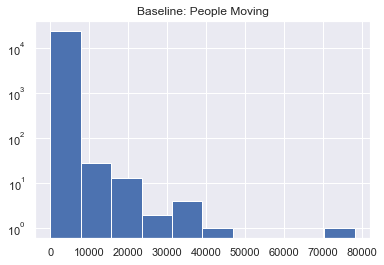

In [57]:
df.hist('Baseline: People Moving', log=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f530d50>]],
      dtype=object)

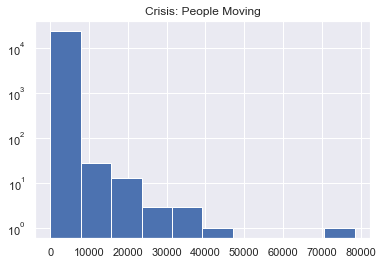

In [58]:
df.hist('Crisis: People Moving', log=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a6a1c90>]],
      dtype=object)

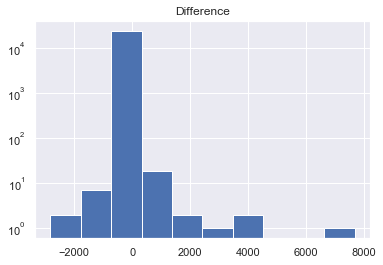

In [59]:
df.hist('Difference', log=True)

In [60]:
df.to_csv('cleansed_data/Sept_10_16.csv')

# Baseline DiGraph

In [61]:
def create_edgelist(df, when):
    if when.lower()=='baseline':
        return list(zip(df['Starting Region Name'], df['Ending Region Name'], df['Baseline: People Moving']))
    elif when.lower()=='crisis':
        return list(zip(df['Starting Region Name'], df['Ending Region Name'], df['Crisis: People Moving']))
    else:
        raise ValueError('Please choose one between "baseline" and "crisis".')

In [62]:
edgelist = create_edgelist(df, 'Baseline')

In [63]:
def create_graph(edgelist, self_edges=True, zero_weight_edges=False, directed=True, reverse=False):
    G = igraph.Graph(directed=directed)
    weight = []
    el = []
    vx = set()
    for edge in edgelist:
        vx.add(edge[0])
        vx.add(edge[1])
        if zero_weight_edges:
            if self_edges:
                if reverse:
                    el.append((edge[1], edge[0]))
                else:
                    el.append((edge[0], edge[1]))
                weight.append(edge[2])
            elif edge[0]!=edge[1]:
                if reverse:
                    el.append((edge[1], edge[0]))
                else:
                    el.append((edge[0], edge[1]))
                weight.append(edge[2])
        elif edge[2]!=0:
            if self_edges:
                if reverse:
                    el.append((edge[1], edge[0]))
                else:
                    el.append((edge[0], edge[1]))
                weight.append(edge[2])
            elif edge[0]!=edge[1]:
                if reverse:
                    el.append((edge[1], edge[0]))
                else:
                    el.append((edge[0], edge[1]))
                weight.append(edge[2])
    G.add_vertices(list(vx))
    G.add_edges(el)
    G.es['weight'] = weight
    return G

## Basic Statistics

In [64]:
def basic_stats(edgelist):
    G = create_graph(edgelist, zero_weight_edges=False)
    G_no_self = create_graph(edgelist, zero_weight_edges=False, self_edges=False)
    print 'number of nodes: %d' % G.vcount()
    print 'number of weighted edges: %d' % G.ecount()
    print 'total FB users: %d' % np.sum(G.es['weight'])
    print 'total FB users travelling between cities: %d' % np.sum(G_no_self.es['weight'])

In [65]:
basic_stats(edgelist)

number of nodes: 2981
number of weighted edges: 20146
total FB users: 2559976
total FB users travelling between cities: 588515


## pagerank, in-degree, out-degree, closeness, betweenness, cluster coefficient

In [66]:
def df_lonlat(df):
    df_start = df[['Starting Region Name', 'Starting location lon', 'Starting location lat']].rename(columns={'Starting Region Name': 'region name', 'Starting location lon': 'lon', 'Starting location lat':'lat'})
    df_end = df[['Ending Region Name', 'Ending location lon', 'Ending location lat']].rename(columns={'Ending Region Name': 'region name', 'Ending location lon': 'lon', 'Ending location lat': 'lat'})
    df_regions = pd.concat([df_start, df_end]).groupby('region name').mean().reset_index()
    return df_regions

In [67]:
#return pagerank, in-degree, out-degree, self-edge weight, closeness, betweenness, cluster coefficient.
# 'edgelist' overwrites 'when'.

def calc_params(df, when='crisis', edgelist=None, reverse=False): 
    df_regions = df_lonlat(df)
    if edgelist is None:
        edgelist = create_edgelist(df, when)
    G_no_self = create_graph(edgelist, reverse=reverse, self_edges=False)
    G = create_graph(edgelist, reverse=reverse, self_edges=True)
    G_no_self_und = create_graph(edgelist, reverse=reverse, self_edges=False, directed=False)
    prs = G_no_self.pagerank(weights='weight')
    prs_incl_self = G.pagerank(weights='weight')
    indeg = G.strength(mode=2, loops=False, weights='weight')
    indeg_incl_self = G.strength(mode=2, loops=True, weights='weight')
    outdeg = G.strength(mode=1, loops=False, weights='weight')
    outdeg_incl_self = G.strength(mode=1, loops=True, weights='weight')
    totdeg = np.array(indeg) + np.array(outdeg)
    totdeg_incl_self = np.array(indeg_incl_self) + np.array(outdeg_incl_self)
    cls = G_no_self.closeness(weights='weight')
    btw = G_no_self.betweenness(weights='weight')
    weighted_clust_coef = G_no_self_und.transitivity_local_undirected(mode="zero", weights='weight')
    clust_coef = G_no_self_und.transitivity_local_undirected(mode="zero")
    df_pr = pd.DataFrame(data={'region name':G.vs['name'], 'pagerank':prs, 'pagerank_incl_loops': prs_incl_self,
                              'in_degree': indeg, 'in_degree_incl_loops': indeg_incl_self, 'out_degree': outdeg,
                              'out_degree_incl_loops': outdeg_incl_self, 'total_degree': totdeg,
                              'total_degree_incl_loops': totdeg_incl_self, 'closeness': cls, 'betweenness': btw,
                              'weighted_cluster_coef': np.array(weighted_clust_coef)/2.0, 
                               'cluster_coef': clust_coef})
    df_pr = df_pr.merge(df_regions, how='left', on='region name')
    return df_pr

In [68]:
df_pr = calc_params(df, edgelist=edgelist)

In [69]:
df_pr.head()

,betweenness,closeness,cluster_coef,in_degree,in_degree_incl_loops,out_degree,out_degree_incl_loops,pagerank,pagerank_incl_loops,region name,total_degree,total_degree_incl_loops,weighted_cluster_coef,lon,lat
0,1276.666667,0.004195,0.833333,1.2,1.2,11.2,11.2,0.000058,0.000056,Catlett_1,12.4,12.4,0.913978,-77.665613,38.627165
1,87883.600000,0.004213,0.469697,18.2,18.2,43.0,43.0,0.000063,0.000059,Bryans Road_1,61.2,61.2,0.627600,-77.102418,38.646870
2,5388.083333,0.004194,0.130333,1310.4,1310.4,1219.8,1219.8,0.001183,0.000231,Garner_2,2530.2,2530.2,0.390956,-78.614631,35.651113
3,0.000000,0.004160,0.000000,4.2,4.2,1.6,1.6,0.000067,0.000058,Scottown_2,5.8,5.8,0.000000,-82.397849,38.515196
4,5096.500000,0.004185,0.246753,895.6,3660.8,899.2,3664.4,0.000699,0.000389,Waxhaw_2,1794.8,7325.2,0.447963,-80.772169,34.965767


In [70]:
df_pr.sort_values(by='pagerank', ascending=False).head(100)

,betweenness,closeness,cluster_coef,in_degree,in_degree_incl_loops,out_degree,out_degree_incl_loops,pagerank,pagerank_incl_loops,region name,total_degree,total_degree_incl_loops,weighted_cluster_coef,lon,lat
179,3.744548e+06,0.004234,0.028503,9555.0,87641.8,9676.6,87763.4,0.007176,0.005241,Charlotte_4,19231.6,175405.2,0.081913,-80.820387,34.964151
847,1.244755e+05,0.004208,0.052781,6558.2,39901.2,6480.6,39823.6,0.006039,0.004079,Raleigh_3,13038.8,79724.8,0.183417,-78.631920,35.733118
1482,1.373264e+05,0.004168,0.045688,3062.6,36460.8,2772.2,36170.4,0.004534,0.005976,Knoxville_4,5834.8,72631.2,0.107413,-83.987044,35.929436
2895,9.468163e+04,0.004174,0.063492,3341.0,33755.0,3002.8,33416.8,0.004424,0.004439,Cincinnati_3,6343.8,67171.8,0.180483,-84.319725,39.045349
660,3.116512e+05,0.004217,0.045833,2484.6,23925.2,1781.8,23222.4,0.004405,0.005128,Fayetteville_5,4266.4,47147.6,0.109675,-78.942548,34.974298
2650,1.140000e+02,0.004172,0.097902,4143.2,22394.0,3568.8,21819.6,0.004273,0.003081,Greenville_2,7712.0,44213.6,0.261835,-82.382470,34.774825
1643,4.817000e+03,0.004031,0.101604,2569.2,20867.2,2422.0,20720.0,0.004115,0.003967,Augusta_3,4991.2,41587.2,0.283799,-82.035475,33.431815
406,1.155064e+06,0.004222,0.070159,13570.4,13570.4,12901.8,12901.8,0.004059,0.001577,Washington_11,26472.2,26472.2,0.247563,-77.086362,38.769498
1390,2.546142e+05,0.004214,0.054366,3353.4,30336.0,3108.6,30091.2,0.004039,0.004044,Greensboro_1,6462.0,60427.2,0.153999,-79.853357,36.024060
2653,2.576284e+05,0.004212,0.033424,908.0,11452.4,764.2,11308.6,0.003995,0.004804,Greenville_7,1672.2,22761.0,0.063303,-77.395425,35.545430


In [ ]:
df_regions = df_pr[['region name', 'lon', 'lat']]
for param in df_pr.columns.values:
    if 

## Draw Node Degree Distribution (excluding self-edges)

In [74]:
def draw_deg_dist(edgelist):
    G = nx.DiGraph()
    for edge in edgelist:
        if edge[2]!=0 and edge[0]!=edge[1]:
            G.add_weighted_edges_from([edge])
    #total
    deg_dict = {}
    for node, deg in G.degree(weight='weight'):
        deg_dict.update({node:deg})
    plt.figure(figsize=(10,7))
    sns.distplot(np.log(1 + np.array(deg_dict.values())), kde=True, rug=True, hist_kws={'alpha':0.5}, label='total')
    #in
    in_deg_dict = {}
    for node, deg in G.in_degree(weight='weight'):
        in_deg_dict.update({node:deg})
    sns.distplot(np.log(1 + np.array(in_deg_dict.values())), kde=True, rug=True, hist_kws={'alpha':0.5}, label='in')

    #out
    out_deg_dict = {}
    for node, deg in G.out_degree(weight='weight'):
        out_deg_dict.update({node:deg})
    sns.distplot(np.log(1 + np.array(out_deg_dict.values())), kde=True, rug=True, hist_kws={'alpha':0.5}, label='out')
    plt.xlabel('log(1 + Degree)')
    plt.ylabel('proportion')
    plt.legend()

/anaconda2/envs/Py27/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


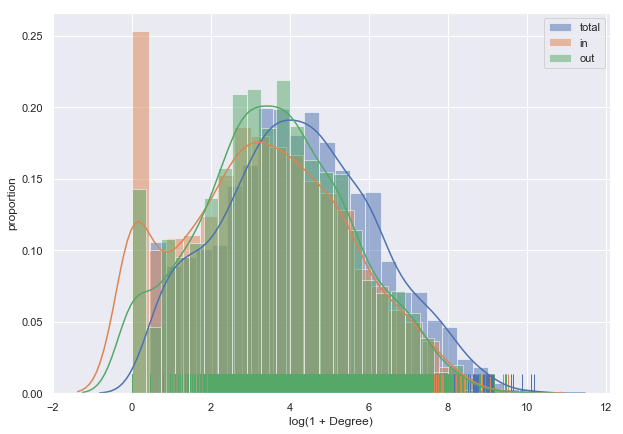

In [75]:
draw_deg_dist(edgelist)

In [92]:
from collections import defaultdict
from collections import OrderedDict

def draw_deg_count(edgelist):
    G = nx.DiGraph()
    for edge in edgelist:
        if edge[2]!=0 and edge[0]!=edge[1]:
            G.add_weighted_edges_from([edge])
    #total
    deg_dict = defaultdict(int)
    for node, deg in G.degree(weight='weight'):
        deg_dict[deg] += 1
    deg = list(deg_dict.keys())
    count = list(map(lambda x: deg_dict.get(x), deg))
    p_tot = np.polyfit(np.log(np.array(deg)+1), np.log(count), 1)
    plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,5))
    plt.subplot(131)
    plt.scatter(np.log(deg), np.log(count))
    plt.xlabel('log(degree)')
    plt.ylabel('log(count)')
    plt.title('total degree')
    
    #in
    deg_dict = defaultdict(int)
    for node, deg in G.in_degree(weight='weight'):
        deg_dict[deg] += 1
    deg = list(deg_dict.keys())
    count = list(map(lambda x: deg_dict.get(x), deg))
    p_in = np.polyfit(np.log(np.array(deg)+1), np.log(count), 1)
    plt.subplot(132)
    plt.scatter(np.log(deg), np.log(count))
    plt.title('in degree')
    
    #out
    deg_dict = defaultdict(int)
    for node, deg in G.out_degree(weight='weight'):
        deg_dict[deg] += 1
    deg = list(deg_dict.keys())
    count = list(map(lambda x: deg_dict.get(x), deg))
    p_out = np.polyfit(np.log(np.array(deg)+1), np.log(count), 1)
    plt.subplot(133)
    plt.scatter(np.log(deg), np.log(count))
    plt.title('out degree')
    
    plt.show()
    print 'total degree: slope={}, intercept={}.'.format(p_tot[0], p_tot[1])
    print 'in degree: slope={}, intercept={}.'.format(p_in[0], p_in[1])
    print 'out degree: slope={}, intercept={}.'.format(p_out[0], p_out[1])

/anaconda2/envs/Py27/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/anaconda2/envs/Py27/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log


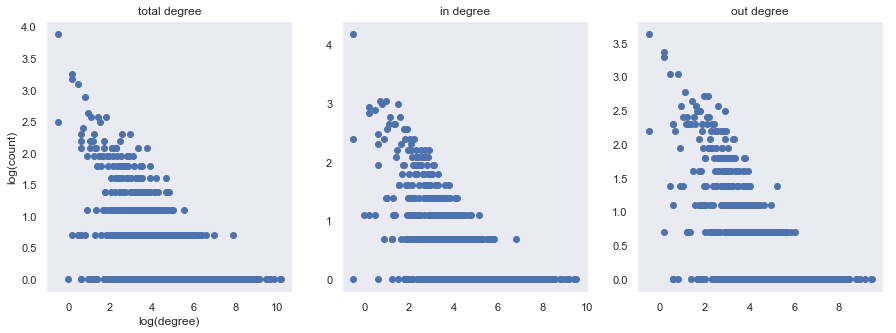

total degree: slope=-0.17748302384, intercept=1.17234682281.
in degree: slope=-0.239704262425, intercept=1.46317720728.
out degree: slope=-0.24651665381, intercept=1.5021338825.


In [93]:
draw_deg_count(edgelist)

## Community Detection

In [78]:
G_no_self = create_graph(edgelist, self_edges=False)

In [79]:
communities = G_no_self.community_label_propagation(weights='weight')

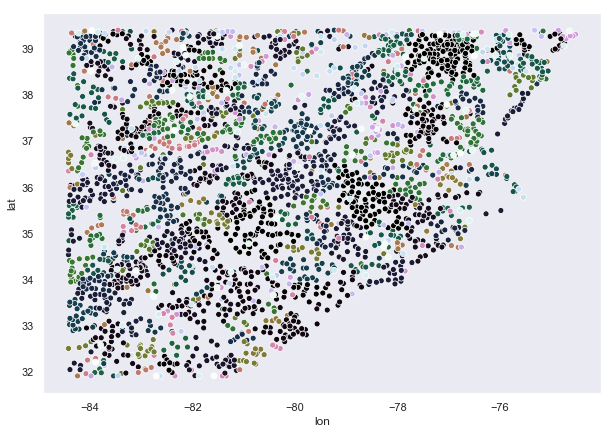

In [80]:
sgs = communities.subgraphs()
clust = [-1]*df_pr.shape[0]
for k in range(df_pr.shape[0]):
    for i in range(len(sgs)):
        if df_pr['region name'].iloc[k] in sgs[i].vs['name']:
            clust[k] = i
df_pr['community'] = clust
plt.figure(figsize=(10, 7))
sns.set_style('dark')
sns.scatterplot(x='lon', y='lat', hue='community', palette = 'cubehelix', data=df_pr, legend=False)

In [94]:
def draw_communities(df_regions, threshold=10, popup=True): # df_regions contains lon, lat, region name, community.
    df_community_size = df_regions['community'].value_counts().reset_index()
    df_community_size = df_community_size[(df_community_size['community'] >=threshold) &(df_community_size['index']!=-1)]
    from matplotlib import colors as mcolors
    colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
    picked = np.random.choice(colors.keys(), df_community_size.shape[0], replace=False)
    colors_dict = {df_community_size['index'].iloc[i]:picked[i] for i in range(df_community_size.shape[0])}
    
    m = folium.Map(location=[35.7596, -79.0193], zoom_start=6)
    names = df_regions['region name'].str.replace('_.+County_.+', '').str.replace('[^a-zA-Z]', '')
    if popup:
        for i in range(df_regions.shape[0]):
            if df_regions['community'].iloc[i] in colors_dict.keys():
                lat = df_regions['lat'].iloc[i]
                lon = df_regions['lon'].iloc[i]
                c = colors_dict[df_regions['community'].iloc[i]]
                folium.Circle(
                    radius=200,
                    location=[lat, lon],
                    #tooltip = names.iloc[i],
                    popup = folium.Popup(names.iloc[i],parse_html=True),
                    color=c
                ).add_to(m)
    else:
        for i in range(df_regions.shape[0]):
            if df_regions['community'].iloc[i] in colors_dict.keys():
                lat = df_regions['lat'].iloc[i]
                lon = df_regions['lon'].iloc[i]
                c = colors_dict[df_regions['community'].iloc[i]]
                folium.Circle(
                    radius=200,
                    location=[lat, lon],
                    color=c
                ).add_to(m)
    return m

Visualize communities using Folium interactive map

In [98]:
m = draw_communities(df_pr, threshold=20)

In [99]:
m

In [97]:
m.save("baseline_time_16_size_20.html")

In [85]:
m = draw_communities(df_pr, threshold=10, popup=False)
m

In [86]:
m.save("baseline_time_16_size_10.html")

In [87]:
df_pr.to_csv('cleansed_data/baseline_16.csv')

# Crisis DiGraph

In [217]:
edgelist_crisis = list(zip(df['Starting Region Name'], df['Ending Region Name'], df['Crisis: People Moving']))
G_crisis = create_graph(edgelist_crisis)

In [218]:
basic_stats(G_crisis, 'Crisis')

number of nodes: 2899
number of weighted edges: 20313
total FB users: 2482304
total FB users travelling between cities: 419583


     log(PR)      region name        lon        lat  community
0  -5.416576      Baltimore_2 -76.829516  39.034119         11
1  -5.548473         Athens_3 -83.419232  33.948815         16
2  -5.583431   Fayetteville_5 -79.015504  34.941318         17
3  -5.629598     Greenville_7 -77.360838  35.500142         17
4  -5.637797      Knoxville_4 -83.979415  35.875629         19
5  -5.668549        Raleigh_3 -78.643845  35.697405         17
6  -5.749873      Charlotte_4 -80.886725  34.945569         37
7  -5.780042        Augusta_3 -82.026001  33.358464         25
8  -5.800428  Silver Spring_1 -77.084930  38.963142         11
9  -5.814963      Arlington_1 -77.283639  38.567293         11
10 -5.866857       Culpeper_1 -77.991748  38.435153          0
11 -5.886640    Spartanburg_2 -81.968496  34.883543         20
12 -5.926929      Pikeville_5 -82.540470  37.430722         22
13 -5.936500  Winston Salem_1 -80.255830  35.992246         14
14 -5.945616     Greensboro_1 -79.711127  35.928655    

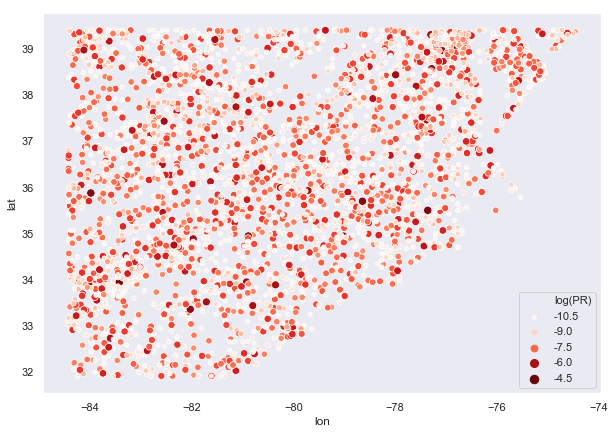

In [219]:
df_pr_c = calc_PR(G_crisis, df_regions)

     log(PR)        region name        lon        lat  community
0  -4.444919        Charlotte_4 -80.886725  34.945569         37
1  -4.997156  Charlottesville_3 -78.439707  37.920006         18
2  -5.098225       Charleston_6 -81.652820  38.268187         22
3  -5.113358        Knoxville_4 -83.979415  35.875629         19
4  -5.197619        Baltimore_2 -76.829516  39.034119         11
5  -5.218315           Hazard_2 -83.166623  37.231631         22
6  -5.239265        Parkersburg -81.543022  39.199751         22
7  -5.265985       Greensboro_1 -79.711127  35.928655         14
8  -5.267825       Greenville_7 -77.360838  35.500142         17
9  -5.296951     Fayetteville_5 -79.015504  34.941318         17
10 -5.321489       Wilmington_2 -77.954341  34.193377         17
11 -5.359364        Pikeville_5 -82.540470  37.430722         22
12 -5.363391            Beckley -81.150864  37.663257         22
13 -5.387155       Cincinnati_3 -84.117144  38.971289         21
14 -5.398220           At

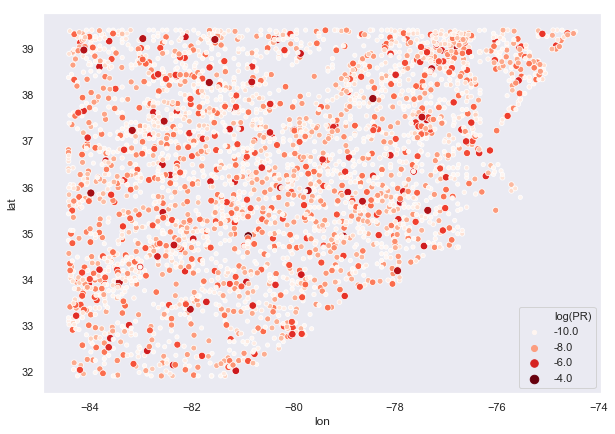

In [221]:
G_crisis_rev = create_graph(edgelist_crisis, reverse=True)
df_pr_c_rev = calc_PR(G_crisis_rev, df_regions)

In [63]:
nx.write_graphml(G,'so.graphml')

In [197]:
G_z = nx.DiGraph()
edgelist = list(zip(df['Starting Region Name'], df['Ending Region Name'], df['Standard (Z) Score']))
for edge in edgelist:
    if edge[2]!= None:
        G_z.add_weighted_edges_from([edge])

In [222]:
G_no_self = nx.DiGraph()
#edgelist = list(zip(df['Starting Location'], df['Ending Location'], df['Baseline: People Moving']))
for edge in edgelist:
    if edge[2]!=0 and edge[0]!=edge[1]:
        G_no_self.add_weighted_edges_from([edge])

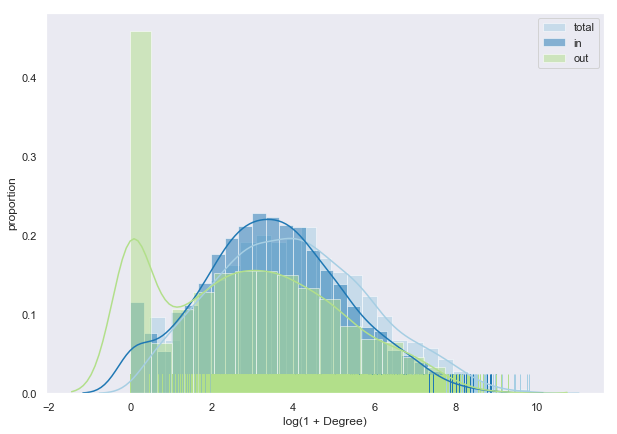

In [223]:
draw_deg_dist(G_no_self)

/anaconda2/envs/Py27/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
/anaconda2/envs/Py27/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log


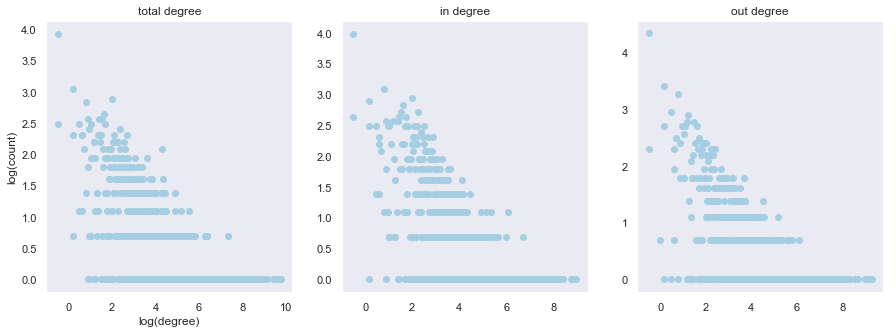

In [224]:
draw_deg_count(G_no_self)

# Upcoming Plan

1. Better (potentially interactive) visualization on map
2. Time Evolution of graph
3. Track evacuated counties (subgraphs) and selected cities (nodes)
4. Define anomalies: Z scores? L-1 norm of histogram? Monte Carlo? etc.

In [ ]:
# agent-based model Anylogic.
# e.g. remove Raleigh to see changes in movement.

Google API to track movement along real world road network.

PageRank good or not? Different options: deg centraities?

Resilience:
1. how to measure regional movement
2. can time of movement be related to evacuation order
3. storm arrival?
4. track power outage? road congestion?
5. link people and infrastructure.